In [50]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [51]:
## Note: please run through all the code here
RANK = 1
# RANK = 2 
# RANK = 4 
# RANK = 8 

## after 4 runs, set the following to be True
PLOT_TREND=False # True

# compare them for 5 time snapshots - plot the tr/te error vs time

- True at 512x256
- POD 256x128 rank r
- CNN 128x64 rank r
- CNN 256x128 rank r
- NIF rank r

## 1. read POD model

In [52]:
dir_name = 'RT_POD_128x256_RANK_'+str(RANK)
tmp=np.load('./POD/'+dir_name+'/err.npz')

train_pod_learning_err   =  tmp['train_mse_per_pixel_12']
train_pod_projection_err =  tmp['train_mse_per_pixel_23']
train_pod_total_err      =  tmp['train_mse_per_pixel_13']

test_pod_learning_err   =  tmp['test_mse_per_pixel_12']
test_pod_projection_err =  tmp['test_mse_per_pixel_23']
test_pod_total_err      =  tmp['test_mse_per_pixel_13']

## 2. read CNN model

### 64x32

In [53]:
dir_name = 'RT_CNN_32x64_16,32,64_RANK_'+str(RANK)+'_ACT_swish'
tmp=np.load('./CNN/'+dir_name+'/err.npz')

train_cnn_l_learning_err   =  tmp['train_mse_per_pixel_12']
train_cnn_l_projection_err =  tmp['train_mse_per_pixel_23']
train_cnn_l_total_err      =  tmp['train_mse_per_pixel_13']

test_cnn_l_learning_err   =  tmp['test_mse_per_pixel_12']
test_cnn_l_projection_err =  tmp['test_mse_per_pixel_23']
test_cnn_l_total_err      =  tmp['test_mse_per_pixel_13']

### 128x64

In [54]:
dir_name = 'RT_CNN_64x128_16,32,64_RANK_'+str(RANK)+'_ACT_swish'
tmp=np.load('./CNN/'+dir_name+'/err.npz')

train_cnn_m_learning_err   =  tmp['train_mse_per_pixel_12']
train_cnn_m_projection_err =  tmp['train_mse_per_pixel_23']
train_cnn_m_total_err      =  tmp['train_mse_per_pixel_13']

test_cnn_m_learning_err   =  tmp['test_mse_per_pixel_12']
test_cnn_m_projection_err =  tmp['test_mse_per_pixel_23']
test_cnn_m_total_err      =  tmp['test_mse_per_pixel_13']

### 256x128

In [55]:
dir_name = 'RT_CNN_128x256_16,32,64_RANK_'+str(RANK)+'_ACT_swish'
tmp=np.load('./CNN/'+dir_name+'/err.npz')

train_cnn_h_learning_err   =  tmp['train_mse_per_pixel_12']
train_cnn_h_projection_err =  tmp['train_mse_per_pixel_23']
train_cnn_h_total_err      =  tmp['train_mse_per_pixel_13']

test_cnn_h_learning_err   =  tmp['test_mse_per_pixel_12']
test_cnn_h_projection_err =  tmp['test_mse_per_pixel_23']
test_cnn_h_total_err      =  tmp['test_mse_per_pixel_13']


## 3. read NIF model

In [56]:
%ls NIF

infer-trained-model-conflux.py
infer-trained-model.py
new-umich/
old/
RT_NIF_SIREN_NSX_128_LSX_2_NST_64_LST_2_NP_1_NSENSOR_32_ACTREG_1.0/
RT_NIF_SIREN_NSX_128_LSX_2_NST_64_LST_2_NP_2_NSENSOR_32_ACTREG_1.0/
RT_NIF_SIREN_NSX_128_LSX_2_NST_64_LST_2_NP_4_NSENSOR_32_ACTREG_1.0/
RT_NIF_SIREN_NSX_128_LSX_2_NST_64_LST_2_NP_8_NSENSOR_32_ACTREG_1.0/
run_nif_txy_siren_rt_autoencoder.py


In [57]:
dir_name = 'RT_NIF_SIREN_NSX_128_LSX_2_NST_64_LST_2_NP_'+str(RANK)+'_NSENSOR_32_ACTREG_1.0/saved_model_ckpt_800'
tmp=np.load('./NIF/'+dir_name+'/pred.npz')

y_pred_tr =  tmp['train_nif_pred_projected_on_hr']
y_true_tr =  tmp['train_true_on_hr']

y_pred_te =  tmp['test_nif_pred_projected_on_hr']
y_true_te =  tmp['test_true_on_hr']


train_nif_total_err = np.linalg.norm(y_pred_tr - y_true_tr, axis=(1,2))**2/y_pred_tr.shape[1]/y_pred_tr.shape[2]
test_nif_total_err = np.linalg.norm(y_pred_te - y_true_te, axis=(1,2))**2/y_pred_tr.shape[1]/y_pred_tr.shape[2]

# Plot all the errors 

/home/shaowu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:126: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


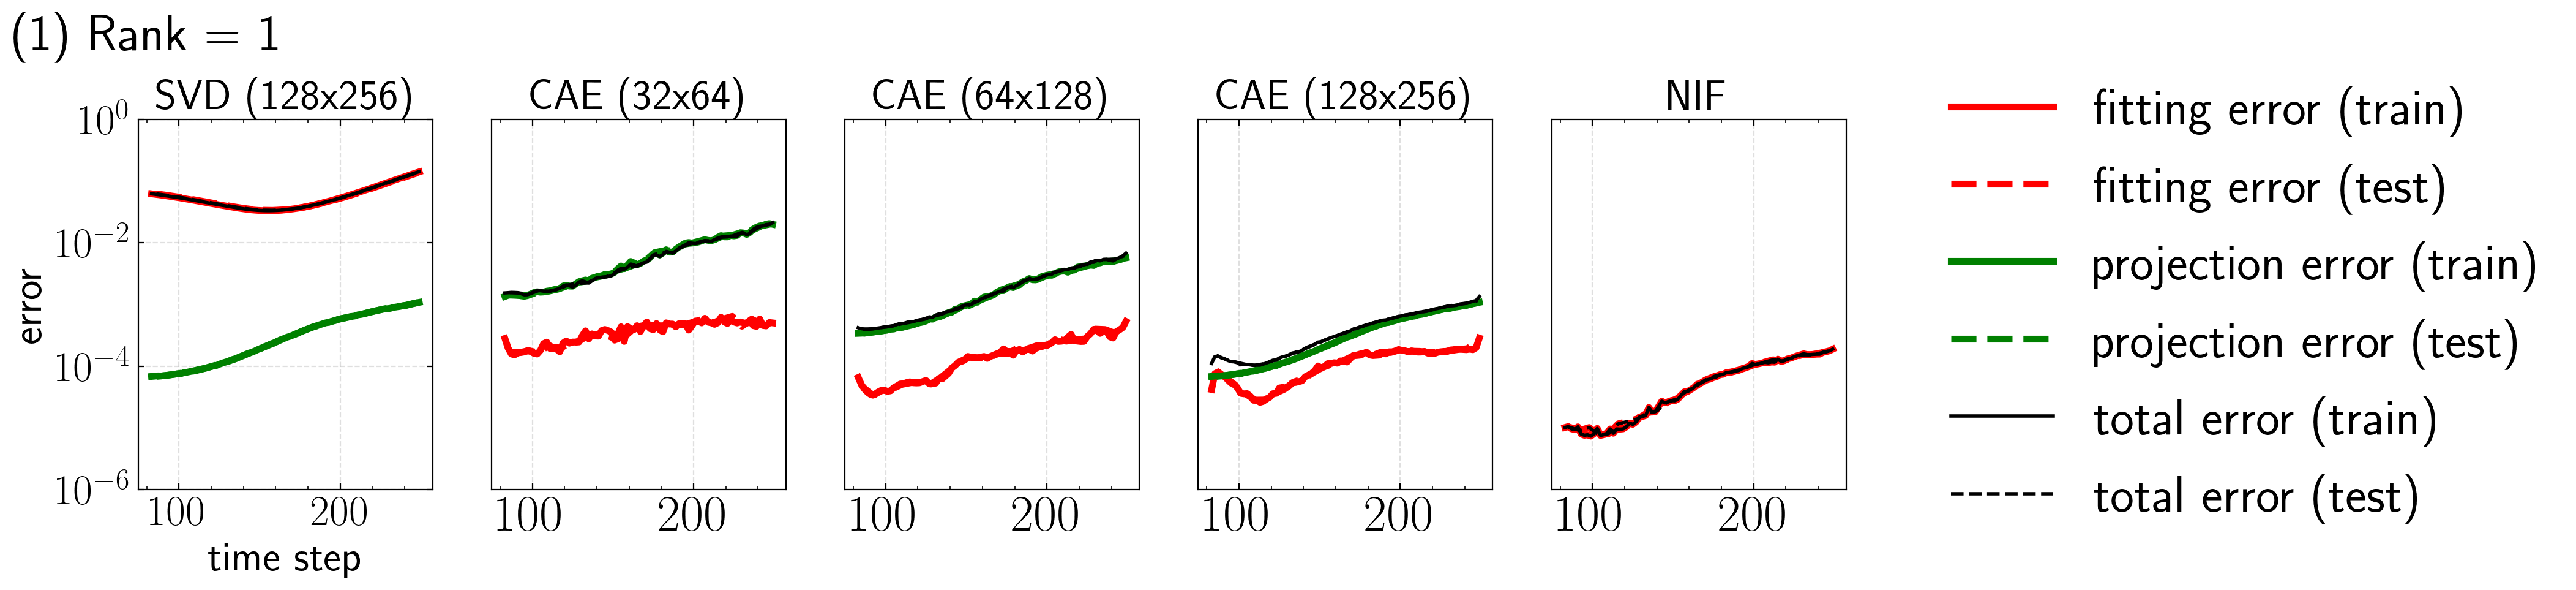

In [58]:
train_index = set(np.arange(83, 250, 2))
test_index = set(np.arange(83, 250, 3)).difference(train_index)

train_index = np.array(list(train_index))
train_index.sort()
test_index = np.array(list(test_index))
test_index.sort()


fig,axs=plt.subplots(1,5,figsize=(18,4))

# POD
# - learning
axs[0].plot(train_index, train_pod_learning_err, 'r-',lw=4,label='fitting error (train)')
axs[0].plot(test_index, test_pod_learning_err,'r--',lw=4,label='fitting error (test)' )
axs[0].set_xlabel('time step',size=25)
axs[0].set_ylabel('error',size=25)
axs[0].tick_params(axis='both', labelsize=25)


# - projection
axs[0].plot(train_index, train_pod_projection_err, 'g-',lw=4,label='projection error (train)')
axs[0].plot(test_index, test_pod_projection_err,'g--',lw=4,label='projection error (test)')

# - total 
axs[0].plot(train_index, train_pod_total_err, 'k-',lw=2,label='total error (train)')
axs[0].plot(test_index, test_pod_total_err,'k--',lw=2,label='total error (test)')

axs[0].set_ylim([1e-6,1e-0])
axs[0].set_yscale('log')

axs[0].set_title('SVD (128x256)',fontsize=25)

# axs[0].legend(loc='best')

# CNN - low res
# - learning
axs[1].plot(train_index, train_cnn_l_learning_err, 'r-',lw=4)
axs[1].plot(test_index, test_cnn_l_learning_err,'r--',lw=4)

# - projection
axs[1].plot(train_index, train_cnn_l_projection_err, 'g-',lw=4)
axs[1].plot(test_index, test_cnn_l_projection_err,'g--',lw=4)

# - total 
axs[1].plot(train_index, train_cnn_l_total_err, 'k-',lw=2)
axs[1].plot(test_index, test_cnn_l_total_err,'k--',lw=2)

axs[1].set_ylim([1e-6,1e-0])
axs[1].set_yscale('log')
axs[1].set_xlabel('time step',size=22)

axs[1].set_title('CAE (32x64)',fontsize=25)


# CNN - mid res
# - learning
axs[2].plot(train_index, train_cnn_m_learning_err, 'r-',lw=4)
axs[2].plot(test_index, test_cnn_m_learning_err,'r--',lw=4)

# - projection
axs[2].plot(train_index, train_cnn_m_projection_err, 'g-',lw=4)
axs[2].plot(test_index, test_cnn_m_projection_err,'g--',lw=4)

# - total 
axs[2].plot(train_index, train_cnn_m_total_err, 'k-',lw=2)
axs[2].plot(test_index, test_cnn_m_total_err,'k--',lw=2)

axs[2].set_ylim([1e-6,1e-0])
axs[2].set_yscale('log')
axs[2].set_xlabel('time step',size=30)

axs[2].set_title('CAE (64x128)',fontsize=25)


# CNN - high res
# - learning
axs[3].plot(train_index, train_cnn_h_learning_err, 'r-',lw=4)
axs[3].plot(test_index, test_cnn_h_learning_err,'r--',lw=4)

# - projection
axs[3].plot(train_index, train_cnn_h_projection_err, 'g-',lw=4)
axs[3].plot(test_index, test_cnn_h_projection_err,'g--',lw=4)

# - total 
axs[3].plot(train_index, train_cnn_h_total_err, 'k-',lw=2)
axs[3].plot(test_index, test_cnn_h_total_err,'k--',lw=2)

axs[3].set_ylim([1e-6,1e-0])
axs[3].set_yscale('log')
axs[3].set_xlabel('time step',size=30)

axs[3].set_title('CAE (128x256)',fontsize=25)


# NIF
# - learning
# axs[4].plot(train_index, train_cnn_h_learning_err, 'r-',lw=5)
# axs[4].plot(test_index, test_cnn_h_learning_err,'r--',lw=5)

# # - projection
# axs[4].plot(train_index, train_cnn_h_projection_err, 'b-',lw=3)
# axs[4].plot(test_index, test_cnn_h_projection_err,'b--',lw=3)

# - total 
axs[4].plot(train_index, train_nif_total_err, 'r-',lw=4)
axs[4].plot(test_index, test_nif_total_err,'r--',lw=4)
axs[4].plot(train_index, train_nif_total_err, 'k-',lw=2)
axs[4].plot(test_index, test_nif_total_err,'k--',lw=2)

axs[4].set_ylim([1e-6,1e-0])
axs[4].set_yscale('log')
axs[4].set_xlabel('time step',size=30)

axs[4].set_title('NIF',fontsize=25)


# legend
axs[0].legend(bbox_to_anchor=(6.0, 0.5),fontsize=30,ncol=1)

for i in range(1,5):
    # axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('')
    axs[i].tick_params(axis='both', labelsize=30)
fig.tight_layout()
fig.suptitle('({}) Rank = {}'.format(int(np.log2(RANK)+1),RANK),fontsize=30,x=0.13,y=1.1)

# save fig

plt.savefig('./pngs/error_comparing_rank_'+str(RANK)+'.png', bbox_inches='tight')

## print out error

In [59]:
print('train')
print(np.sqrt(train_pod_total_err).mean())
print(np.sqrt(train_cnn_l_total_err).mean())
print(np.sqrt(train_cnn_m_total_err).mean())
print(np.sqrt(train_cnn_h_total_err).mean())
print(np.sqrt(train_nif_total_err).mean())

print('--')
print('test')

print(np.sqrt(test_pod_total_err).mean())
print(np.sqrt(test_cnn_l_total_err).mean())
print(np.sqrt(test_cnn_m_total_err).mean())
print(np.sqrt(test_cnn_h_total_err).mean())
print(np.sqrt(test_nif_total_err).mean())

train
0.23499434504301878
0.07581048938585354
0.0424055418726005
0.01982344052586778
0.007319739025568719
--
test
0.23602037461169526
0.07643846017270713
0.0427339806990315
0.01995779111204087
0.007408948093537813


In [60]:
# save the time-averaged RMSE for all models in /ERROR
np.savez('./ERROR/rank_'+str(RANK)+'.npz',
        pod_tr_err=np.sqrt(train_pod_total_err).mean(),
        pod_te_err=np.sqrt(test_pod_total_err).mean(),
        cnn_l_tr_err=np.sqrt(train_cnn_l_total_err).mean(),
        cnn_l_te_err=np.sqrt(test_cnn_l_total_err).mean(),
        cnn_m_tr_err=np.sqrt(train_cnn_m_total_err).mean(),
        cnn_m_te_err=np.sqrt(test_cnn_m_total_err).mean(),
        cnn_h_tr_err=np.sqrt(train_cnn_h_total_err).mean(),
        cnn_h_te_err=np.sqrt(test_cnn_h_total_err).mean(), 
          nif_tr_err=np.sqrt(train_nif_total_err).mean(),
          nif_te_err=np.sqrt(test_nif_total_err).mean()
        )

## Plot the error trend over all ranks

10.645636934586099
5.802064400273452
2.6797100448225577


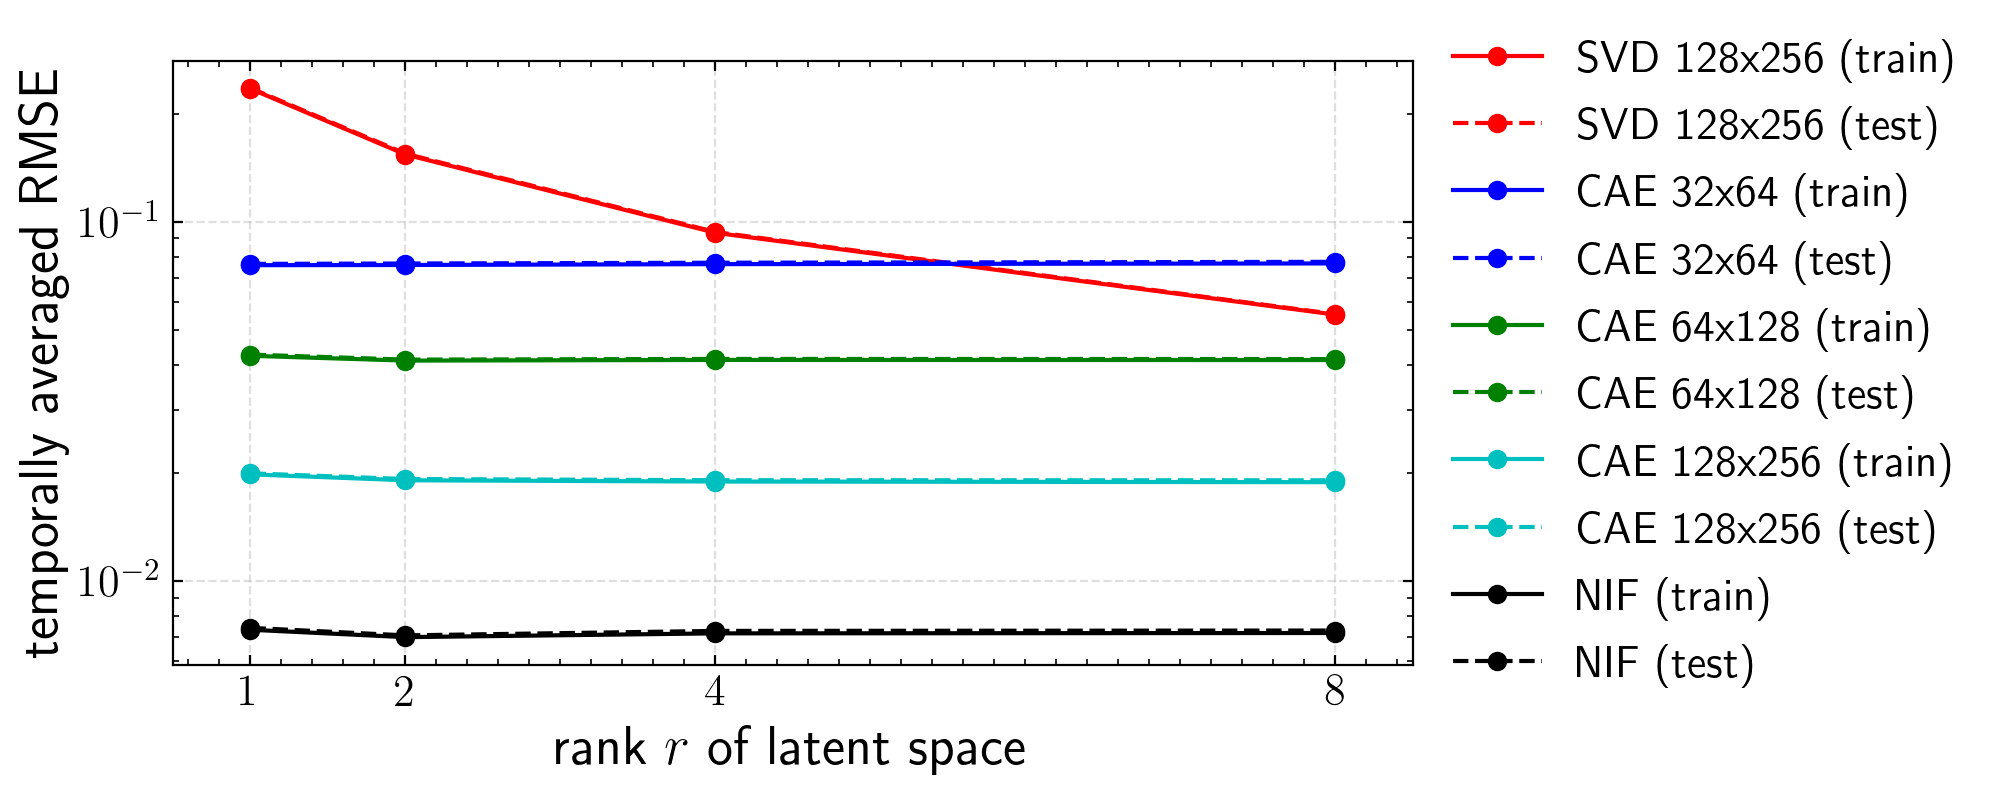

In [61]:


if PLOT_TREND:
    r1=np.load('./ERROR/rank_1.npz')
    r2=np.load('./ERROR/rank_2.npz')
    r3=np.load('./ERROR/rank_4.npz')
    r4=np.load('./ERROR/rank_8.npz')
    
    # arrange data with rank as X-axis
    pod_tr_err_ar = [x['pod_tr_err'] for x in [r1,r2,r3,r4]] 
    pod_te_err_ar = [x['pod_te_err'] for x in [r1,r2,r3,r4]] 
    cnn_l_tr_err_ar = [x['cnn_l_tr_err'] for x in [r1,r2,r3,r4]] 
    cnn_l_te_err_ar = [x['cnn_l_te_err'] for x in [r1,r2,r3,r4]] 
    cnn_m_tr_err_ar = [x['cnn_m_tr_err'] for x in [r1,r2,r3,r4]] 
    cnn_m_te_err_ar = [x['cnn_m_te_err'] for x in [r1,r2,r3,r4]] 
    cnn_h_tr_err_ar = [x['cnn_h_tr_err'] for x in [r1,r2,r3,r4]] 
    cnn_h_te_err_ar = [x['cnn_h_te_err'] for x in [r1,r2,r3,r4]] 
    nif_tr_err_ar = [x['nif_tr_err'] for x in [r1,r2,r3,r4]] 
    nif_te_err_ar = [x['nif_te_err'] for x in [r1,r2,r3,r4]] 
    
    plt.figure(figsize=(8,4))

    rr = [1,2,4,8]
    plt.plot(rr,pod_tr_err_ar,'ro-',label='SVD 128x256 (train)')
    plt.plot(rr,pod_te_err_ar,'ro--',label='SVD 128x256 (test)')
    plt.plot(rr,cnn_l_tr_err_ar,'bo-',label='CAE 32x64 (train)')
    plt.plot(rr,cnn_l_te_err_ar,'bo--',label='CAE 32x64 (test)')
    plt.plot(rr,cnn_m_tr_err_ar,'go-',label='CAE 64x128 (train)')
    plt.plot(rr,cnn_m_te_err_ar,'go--',label='CAE 64x128 (test)')
    plt.plot(rr,cnn_h_tr_err_ar,'co-',label='CAE 128x256 (train)')
    plt.plot(rr,cnn_h_te_err_ar,'co--',label='CAE 128x256 (test)')
    plt.plot(rr,nif_tr_err_ar,'ko-',label='NIF (train)')
    plt.plot(rr,nif_te_err_ar,'ko--',label='NIF (test)')
    
    ## print error ratio
    print(np.mean(cnn_l_tr_err_ar)/np.mean(nif_tr_err_ar))
    print(np.mean(cnn_m_tr_err_ar)/np.mean(nif_tr_err_ar))
    print(np.mean(cnn_h_tr_err_ar)/np.mean(nif_tr_err_ar))
    
    plt.xlabel(r'rank $r$ of latent space',fontsize=20)
    plt.ylabel('temporally averaged RMSE',fontsize=20)
    plt.yscale('log')
    plt.xlim([0.5,8.5])
    plt.xticks([1,2,4,8])
    plt.legend(bbox_to_anchor=(1, 0.5))
    # plt.ylim([1e-3,1e0])
    
    plt.savefig('./pngs/all_rank_total_err.png',dpi=150,bbox_inches='tight')